In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.feature_selection  import SelectKBest()
from sklearn.feature_selection import  chi2()
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset=pd.read_csv("C:\\Users\\Omkar\\Downloads\\train (1).csv")
X= dataset.iloc[:,0:20]
y= dataset.iloc[:,-1]
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
dataset.shape

(2000, 21)

In [5]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [6]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [7]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']

In [8]:
featureScores

,Feature,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [9]:
print(featureScores.nlargest(10,'Score'))

          Feature          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [10]:
warnings.filterwarnings("ignore", category=FutureWarning)
fs = ExtraTreesClassifier()
fs.fit(X,y)

ExtraTreesClassifier()

In [11]:
print(fs.feature_importances_)

[0.06192781 0.01918621 0.03422957 0.01895373 0.03322591 0.01662938
 0.03479803 0.03470698 0.03606092 0.03368519 0.03349747 0.04554768
 0.04819322 0.39255011 0.03466942 0.03459871 0.03565789 0.01419241
 0.01740004 0.02028932]


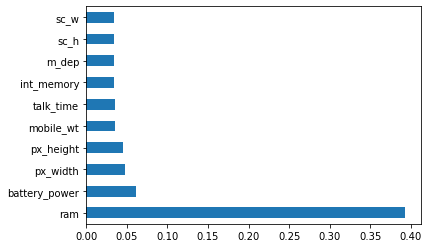

In [12]:
feat_importances = pd.Series(fs.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

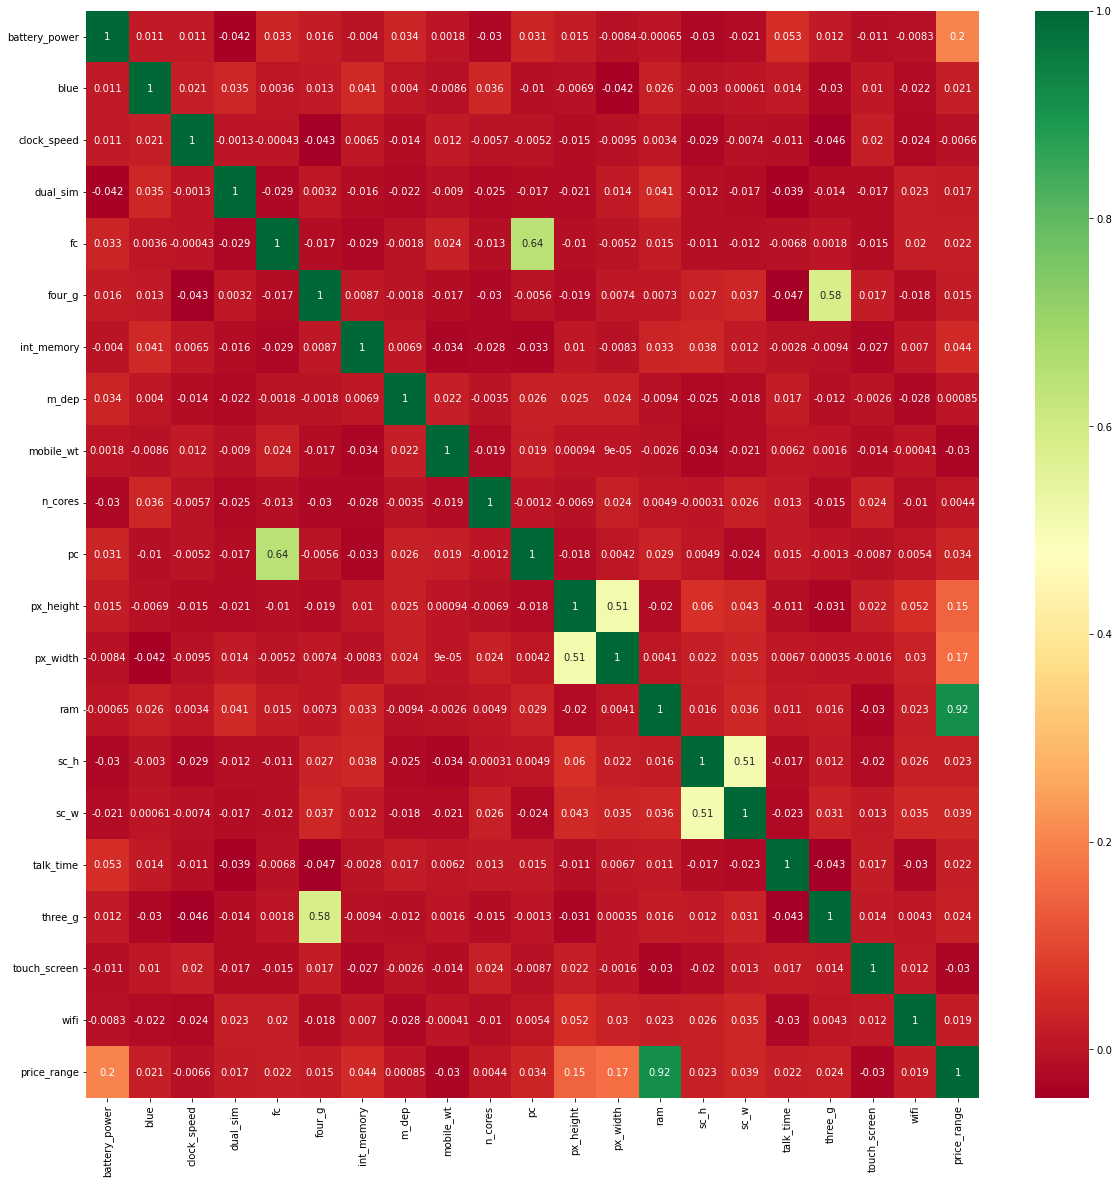

In [13]:
corrnat = dataset.corr()
top_corr_features = corrnat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

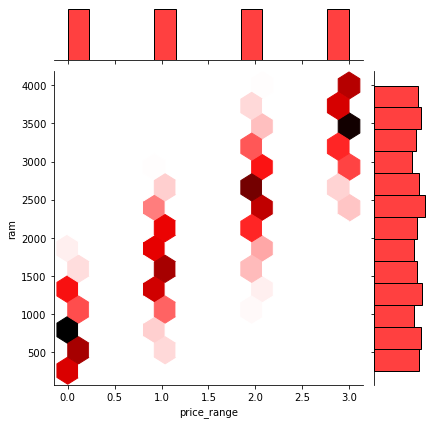

In [14]:
import seaborn as sns 
sns.jointplot(dataset.price_range,dataset.ram,data=dataset, color="red",kind="hex");

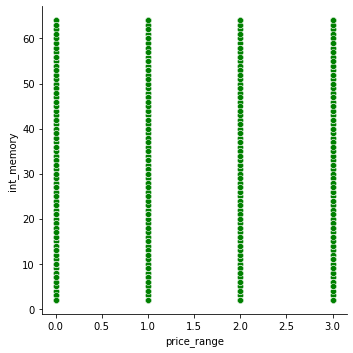

In [15]:
sns.relplot(dataset.price_range,dataset.int_memory,data=dataset, color="green",kind="scatter");

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

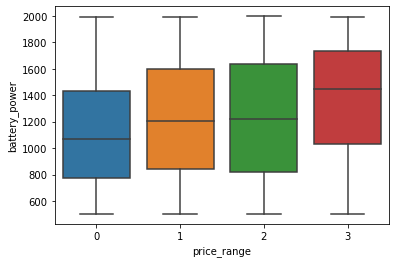

In [16]:
sns.boxplot(dataset.price_range,dataset.battery_power,data=dataset)

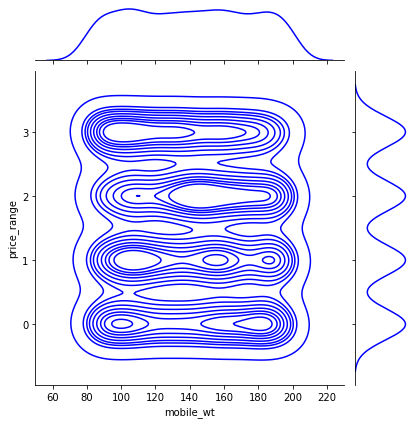

In [17]:
sns.jointplot(dataset.mobile_wt,dataset.price_range,data=dataset,color='blue',kind='kde');

<AxesSubplot:xlabel='talk_time', ylabel='price_range'>

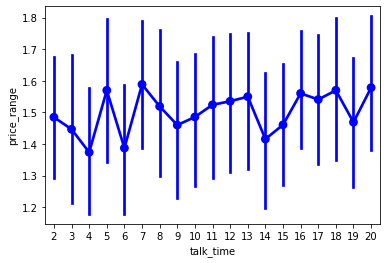

In [18]:
sns.pointplot(dataset.talk_time,dataset.price_range,data=dataset,color="blue")

Text(0.5, 0, 'MegaPixels')

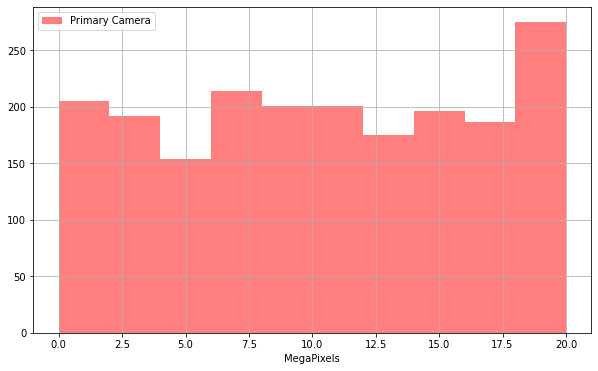

In [19]:
plt.figure(figsize=(10,6))
dataset['pc'].hist(alpha=0.5,color='red',label='Primary Camera')
plt.legend()
plt.xlabel('MegaPixels')

In [20]:
x=dataset.drop('price_range',axis=1)
y=dataset['price_range']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [21]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtree.score(x_test,y_test)
dtree=dtree.score(x_test,y_test)*100
print('\n The accuracy of Decision Tree model:',"%.3f" %dtree,"%")


 The accuracy of Decision Tree model: 81.515 %


In [22]:
lnm = LinearRegression()
lnm.fit(x_train,y_train)
lnm.score(x_test,y_test)
lnm=lnm.score(x_test,y_test)*100
print('\n The accuracy of Linear Regression model :',"%.3f" %lnm,"%")


 The accuracy of Linear Regression model : 91.328 %


In [23]:
warnings.filterwarnings("ignore", category=FutureWarning)
lgm = LogisticRegression()
lgm.fit(x_train,y_train)
lgm.score(x_test,y_test)
lgm=lgm.score(x_test,y_test)*100
print('\n The accuracy of Logistic Regression model :',"%.3f" %lgm,"%")


 The accuracy of Logistic Regression model : 61.818 %


C:\Users\Omkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)
knn=knn.score(x_test,y_test)*100
print('\n The accuracy of KNN model :',"%.3f" %knn,"%")


 The accuracy of KNN model : 92.121 %


In [26]:
data_test=pd.read_csv("C:\\Users\\Omkar\\Downloads\\test (1).csv")

In [27]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [28]:
data_test.shape

(1000, 21)

In [29]:
data_test=data_test.drop("id",axis=1)
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [30]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)
predicted_price=knn.predict(data_test)
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 2, 0, 1, 0, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [31]:
data_test['price_range']=predicted_price
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
